In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:
exp3_flow_df = pd.read_csv('./csv/sensor_data_20250108_180717_not_async_code_cut.csv', sep=',')

In [3]:
exp3_flow_df

,Timestamp,Relative_Time,frequency,flow_rate
0,2025-01-08 18:07:26.400,10.694,2079.4340,3.106667
1,2025-01-08 18:07:26.507,10.801,2079.4340,3.171111
2,2025-01-08 18:07:26.507,10.801,2079.4340,3.171111
3,2025-01-08 18:07:26.616,10.909,2079.4340,3.171111
4,2025-01-08 18:07:26.616,10.909,2079.4340,3.171111
...,...,...,...,...
2186,2025-01-08 18:09:42.050,146.343,737.3544,1.022222
2187,2025-01-08 18:09:42.158,146.451,737.3544,1.022222
2188,2025-01-08 18:09:42.158,146.451,737.3544,1.022222
2189,2025-01-08 18:09:42.267,146.560,737.3544,1.022222


Построение графиков для визуальной оценки

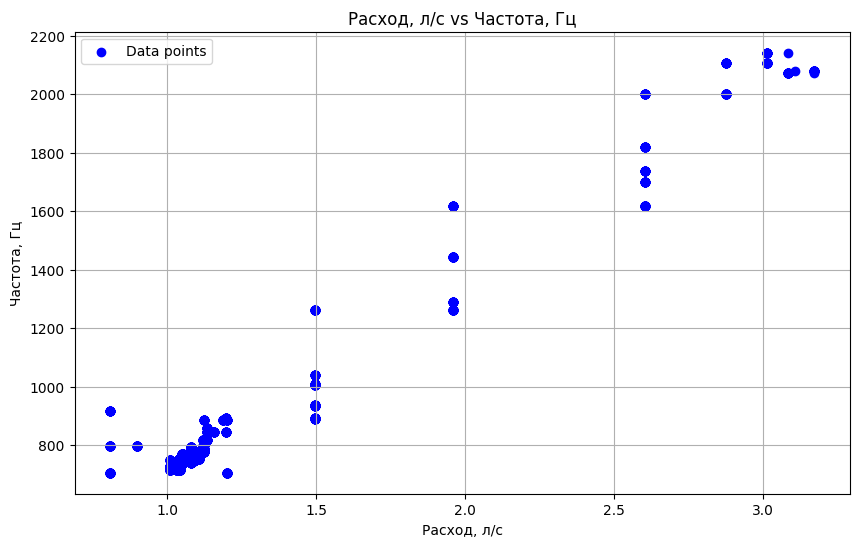

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(exp3_flow_df['flow_rate'], exp3_flow_df['frequency'], c='blue', label="Data points")
plt.xlabel('Расход, л/с')
plt.ylabel('Частота, Гц')
plt.title('Расход, л/с vs Частота, Гц')
plt.legend()
plt.grid()
plt.show()

Рассчет коэффициента корреляции Пирсона

In [5]:
correlation, _ = pearsonr(exp3_flow_df['flow_rate'], exp3_flow_df['frequency'])
print(f'Коэффициент корреляции Пирсона: {correlation:.2f}')

Коэффициент корреляции Пирсона: 0.98


Построение линейной регрессии

In [6]:
X = exp3_flow_df['flow_rate'].values.reshape(-1, 1)  # Преобразование в двухмерный массив
y = exp3_flow_df['frequency'].values

model = LinearRegression()
model.fit(X, y)
line = model.predict(X)

Вычисление коэффициентов регрессии и коэффициента детерминации

In [7]:
r_squared = model.score(X, y)
intercept = model.intercept_
slope = model.coef_[0]

Оценка регрессионной модели

In [8]:
print(f'Коэффициент детерминации R^2: {r_squared:.2f}')
print(f'Коэффициенты регрессии: Интерсепт={intercept}, Наклон={slope}')

Коэффициент детерминации R^2: 0.96
Коэффициенты регрессии: Интерсепт=67.19133651993002, Наклон=657.5940211894773


Визуализация линейной регрессии

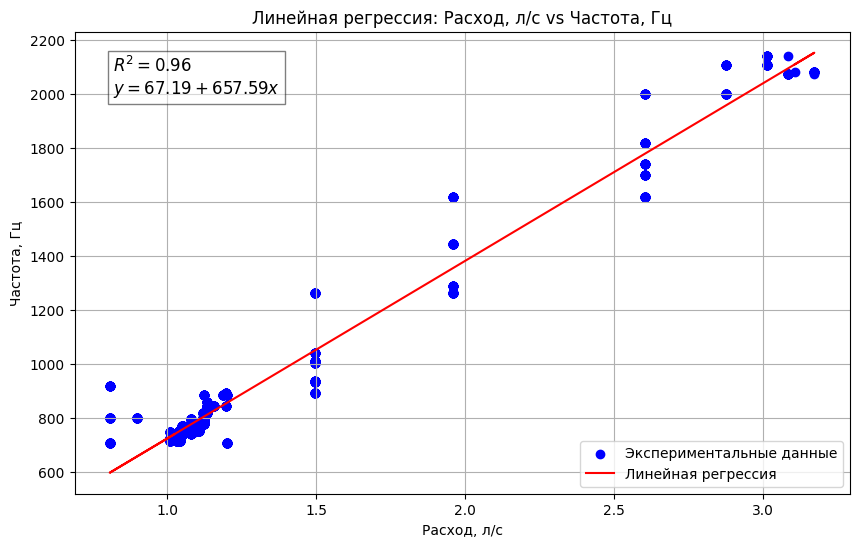

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(exp3_flow_df['flow_rate'], exp3_flow_df['frequency'], c='blue', label="Экспериментальные данные")
plt.plot(exp3_flow_df['flow_rate'], line, color='red', label="Линейная регрессия")
plt.xlabel('Расход, л/с')
plt.ylabel('Частота, Гц')
plt.title('Линейная регрессия: Расход, л/с vs Частота, Гц')
plt.text(0.05, 0.95, f'$R^2={r_squared:.2f}$\n$y={intercept:.2f}+{slope:.2f}x$', fontsize=12, 
         ha='left', va='top', transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.5))
plt.legend()
plt.grid()
plt.savefig(f'./results/lintar_regression.png')
plt.show()